# Python and Data Science
## Machine Learning
### Part 1: Linear Regression using Scikit-Learn

Libraries Used:

- [Numpy](https://www.youtube.com/watch?v=lLRBYKwP8GQ&t=1073s) - Used for making arrays
- [Pandas](https://www.youtube.com/watch?v=zN2Hua6oII0&t=8s) - Used for handling data sets
- [matplotlib](https://www.youtube.com/watch?v=nzKy9GY12yo) - Used for making charts and graphs
- [scikit-learn intro](https://www.youtube.com/watch?v=rvVkVsG49uU) - Used to handle complex mathematics
- [scikit-learn tut](https://www.youtube.com/watch?v=M9Itm95JzL0) - In depth discussion
- [pickle](https://www.youtube.com/watch?v=6Q56r_fVqgw) - Used to preserve trained models


In [8]:
# Library Imports
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [9]:
data = pd.read_csv("student-mat.csv", sep=";")
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [10]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


## Attributes and Labels

In machine learning:

1. **Attributes** (Features): Characteristics or properties of data used as input for algorithms. Also known as variables or features. Represented by a feature vector for each data point.

2. **Labels** (Target Variable): Values we want the model to predict or learn. The dataset is labeled in supervised learning, where each data point has an associated label serving as ground truth.

The goal is to use attributes to learn patterns and relationships that enable the model to predict labels for new, unseen data.

List the attributes here:

What is the label in this example?


In [11]:
predict = "G3"

x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])


In [12]:
# split the data set into set and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

### Linear Regression
 Using a set of data points, the LR algorithm attempts to find a 'line of best fit' through the data.
 The 'line of best fit' is a corrrelation between the data points.
 LR is best used in a situation when there is a strong correlation of data to begin with.
 
 <table>
    <tr>
        <td>
            <img src="LR-data1.png" width="50%" />
        </td>
        <td>
            <img src="LR-data2.png" width="50%" />
        </td>
    </tr>
    <tr>
        <td>
            <p style="text-align:center">Strongly Correlated</p>
        </td>
        <td>
            <p style="text-align:center">Poorly Correlated</p>
        </td>
    </tr>
 </table>
 
 <b>Linear Equation: y = mx + b, where m is the gradient of the line.
 For any given x and a known gradient, y can be predicted.</b>

In [13]:
linear = linear_model.LinearRegression()

linear.fit(x_train,y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.905435355077407


## save the text with pickle


- Use the run all button several times untill we get a high acc value
- Comment out the cell above 


In [14]:
with open ("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

In [15]:
# Load the oickle files
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [16]:
# how to use the model

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [ 0.17021392  0.95815284 -0.21387342 -0.29347305  0.04770394]
Intercept: 
 -1.4825094115764461


In [17]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

18.665967342237956 [19 18  2  0  2] 18
9.14899328794105 [ 7 10  2  0  6] 10
12.327558024514799 [14 12  1  0  3] 12
9.243622413397874 [10  9  3  1 28] 9
7.7566817889653805 [ 9  8  2  1 16] 7
11.60229369776353 [13 12  2  1  2] 12
14.888690818817183 [13 15  1  0  0] 15
8.76166948895712 [ 8  8  1  0 30] 8
4.188015142603286 [6 5 2 0 6] 6
8.265646484978273 [8 9 2 0 4] 10
9.564227172193885 [10 10  2  0  4] 11
14.460943983710536 [13 15  3  0  0] 15
11.939426242464437 [12 12  1  0  2] 14
5.725616972891934 [5 8 2 3 0] 7
12.65255912423385 [10 13  1  0  4] 14
11.936970421026796 [11 12  2  0 10] 13
15.091639907382719 [16 15  4  0  7] 17
11.250102050140836 [12 12  4  0  1] 12
15.015245243650588 [15 15  2  0  0] 15
13.863820818729543 [14 14  3  0  4] 14
3.3944450387272296 [6 5 3 1 0] 0
13.38028115735192 [12 14  3  0  1] 15
19.291781231287445 [19 19  4  0  4] 20
11.51167940735779 [12 12  3  0  2] 11
6.372398454219314 [8 7 1 0 0] 6
11.993054043482793 [10  9  2  0 75] 9
16.239019889000097 [16 16  2  0  

## Plot the data

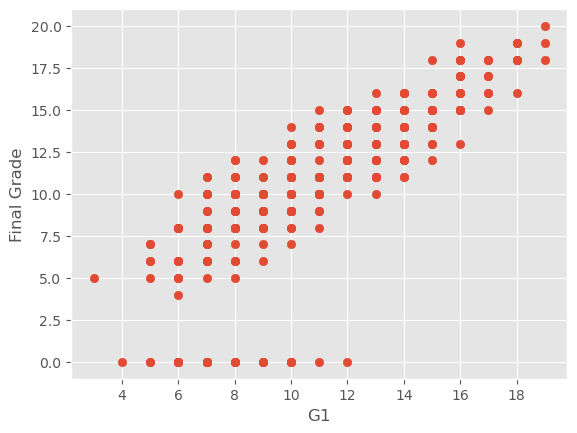

In [18]:
style.use("ggplot")

#set up a scatter plot
p = "G1"
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()